<a href="https://colab.research.google.com/github/codewithdebuu/Data-Science-and-Machine-Learning-Projects/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Manipulation Libraries
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/House Prices Prediction_test.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
print("Shape:")
print(df.shape)
print()
print("Info:")
print(df.info())
print()
print("NaN Values:")
print(df.isnull().sum())
print()
print("NaN Values as Percentage:")
print((df.isnull().sum()/len(df))*100)
print()
print("Duplicates Values:")
print(df.duplicated().sum())
print()

Shape:
(1460, 81)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

## Display all columns that contain any NaN values.

In [ ]:
print("NaN Values as Percentage (with Datatypes):")

records = []   # list to store rows

for col in df.columns:
    pct = (df[col].isnull().sum() / len(df)) * 100
    if pct > 0:   # only include columns with missing values
        records.append([col, pct, df[col].dtype])

# Convert list → DataFrame
nan_df = pd.DataFrame(records, columns=["Column", "NaN_Percentage", "DataType"])

nan_df


NaN Values as Percentage (with Datatypes):


Column  NaN_Percentage DataType
0    LotFrontage       17.739726  float64
1          Alley       93.767123   object
2     MasVnrType       59.726027   object
3     MasVnrArea        0.547945  float64
4       BsmtQual        2.534247   object
5       BsmtCond        2.534247   object
6   BsmtExposure        2.602740   object
7   BsmtFinType1        2.534247   object
8   BsmtFinType2        2.602740   object
9     Electrical        0.068493   object
10   FireplaceQu       47.260274   object
11    GarageType        5.547945   object
12   GarageYrBlt        5.547945  float64
13  GarageFinish        5.547945   object
14    GarageQual        5.547945   object
15    GarageCond        5.547945   object
16        PoolQC       99.520548   object
17         Fence       80.753425   object
18   MiscFeature       96.301370   object

## Remove columns with 40% or more NaN values.

In [ ]:
print("Shape before dropping columns:")
print(df.shape)
print()

for col in df.columns:
  if ((df[col].isnull().sum()/len(df))*100) > 40:
    df.drop(columns=[col], inplace=True)

print("Shape after dropping columns:")
print(df.shape)
print()

Shape before dropping columns:
(1460, 81)

Shape after dropping columns:
(1460, 75)



## Display all columns that contain any NaN values.

In [ ]:
print("NaN Values as Percentage (with Datatypes):")

records = []   # list to store rows

for col in df.columns:
    pct = (df[col].isnull().sum() / len(df)) * 100
    if pct > 0:   # only include columns with missing values
        records.append([col, pct, df[col].dtype])

# Convert list → DataFrame
nan_df = pd.DataFrame(records, columns=["Column", "NaN_Percentage", "DataType"])

nan_df


NaN Values as Percentage (with Datatypes):


Column  NaN_Percentage DataType
0    LotFrontage       17.739726  float64
1     MasVnrArea        0.547945  float64
2       BsmtQual        2.534247   object
3       BsmtCond        2.534247   object
4   BsmtExposure        2.602740   object
5   BsmtFinType1        2.534247   object
6   BsmtFinType2        2.602740   object
7     Electrical        0.068493   object
8     GarageType        5.547945   object
9    GarageYrBlt        5.547945  float64
10  GarageFinish        5.547945   object
11    GarageQual        5.547945   object
12    GarageCond        5.547945   object

## Fill numaric & categorical columns Using For Loop

In [ ]:
# Fill numeric columns
for col in df.select_dtypes(include=['int64','float64']):
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

print("Successfully completed. ")


Successfully completed. 


In [ ]:
print("NaN Values as Percentage (with Datatypes):")

records = []   # list to store rows

for col in df.columns:
    pct = (df[col].isnull().sum() / len(df)) * 100
    if pct > 0:   # only include columns with missing values
        records.append([col, pct, df[col].dtype])

# Convert list → DataFrame
nan_df = pd.DataFrame(records, columns=["Column", "NaN_Percentage", "DataType"])

nan_df


NaN Values as Percentage (with Datatypes):


Empty DataFrame
Columns: [Column, NaN_Percentage, DataType]
Index: []

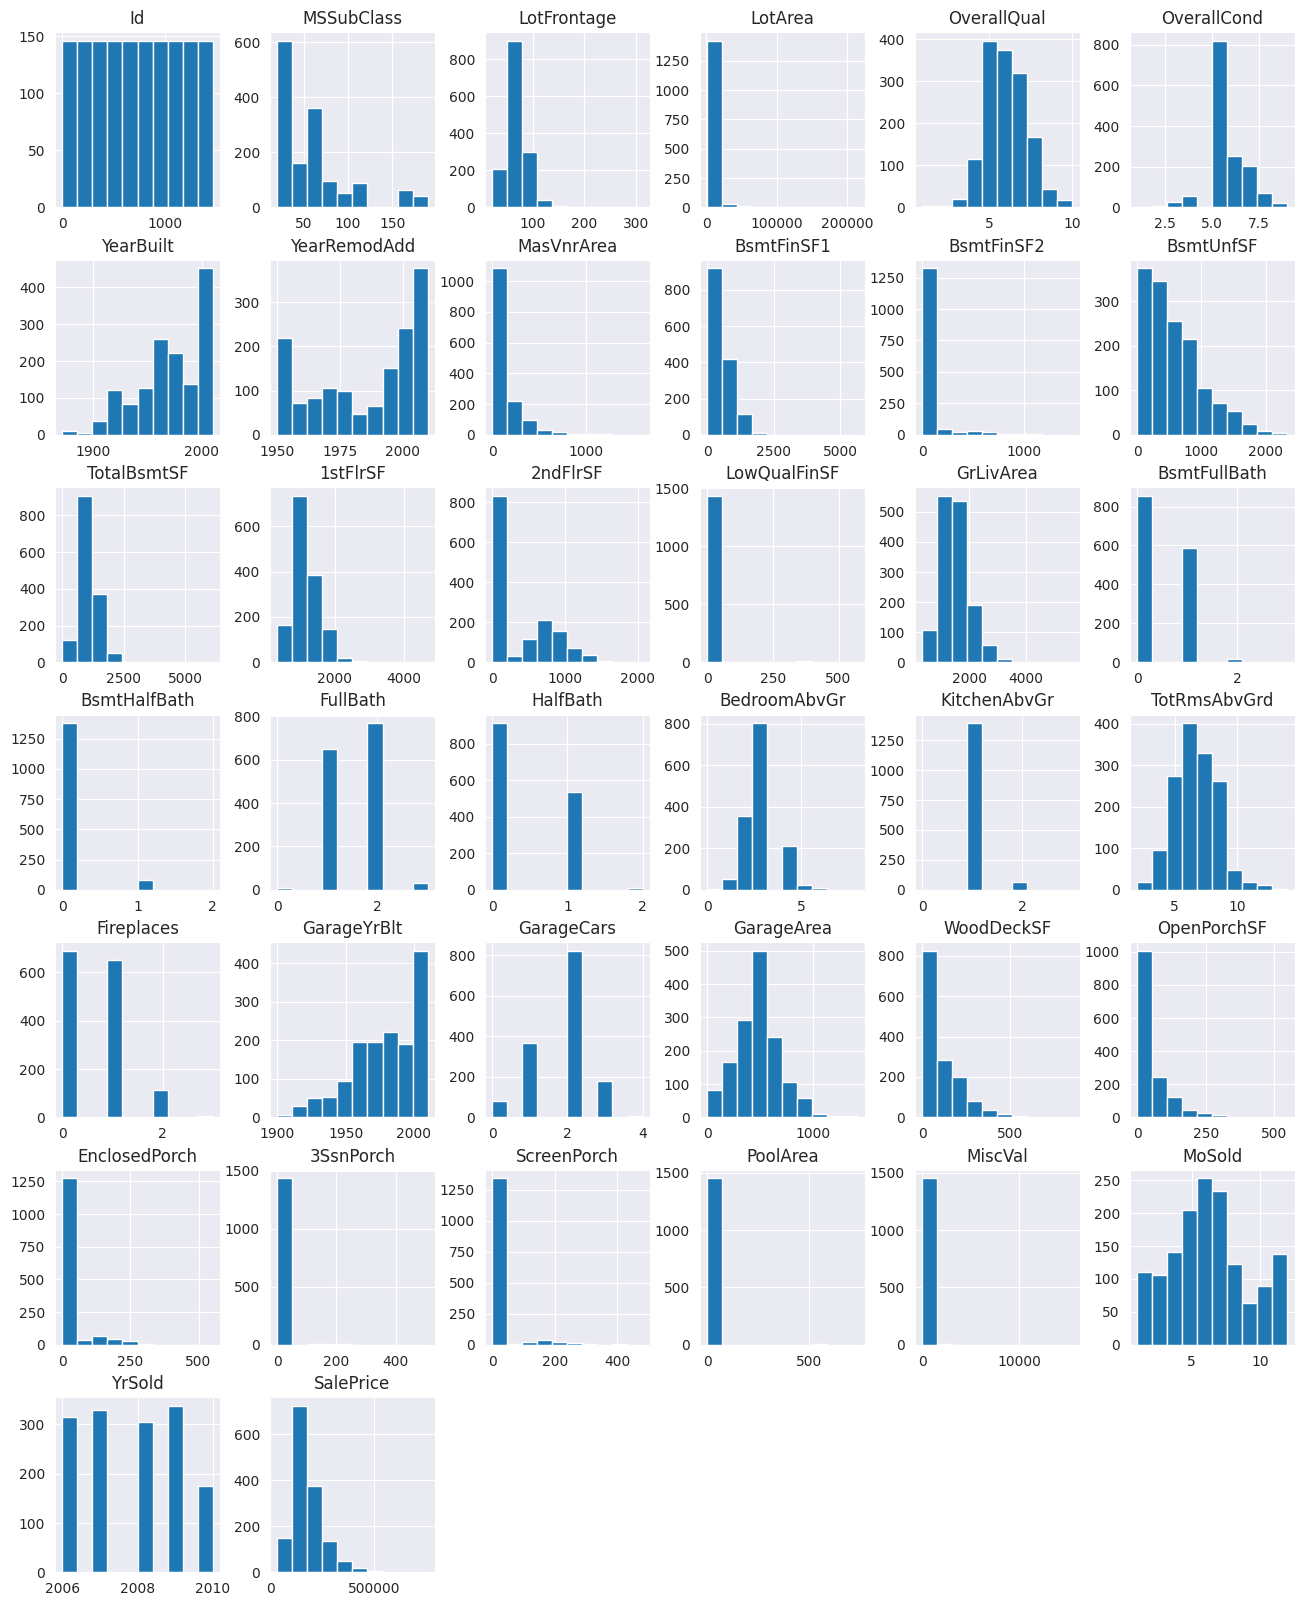

In [ ]:
# Only Numaric Datatype

df.hist(figsize=(16,20))
plt.show()

# All Datatype

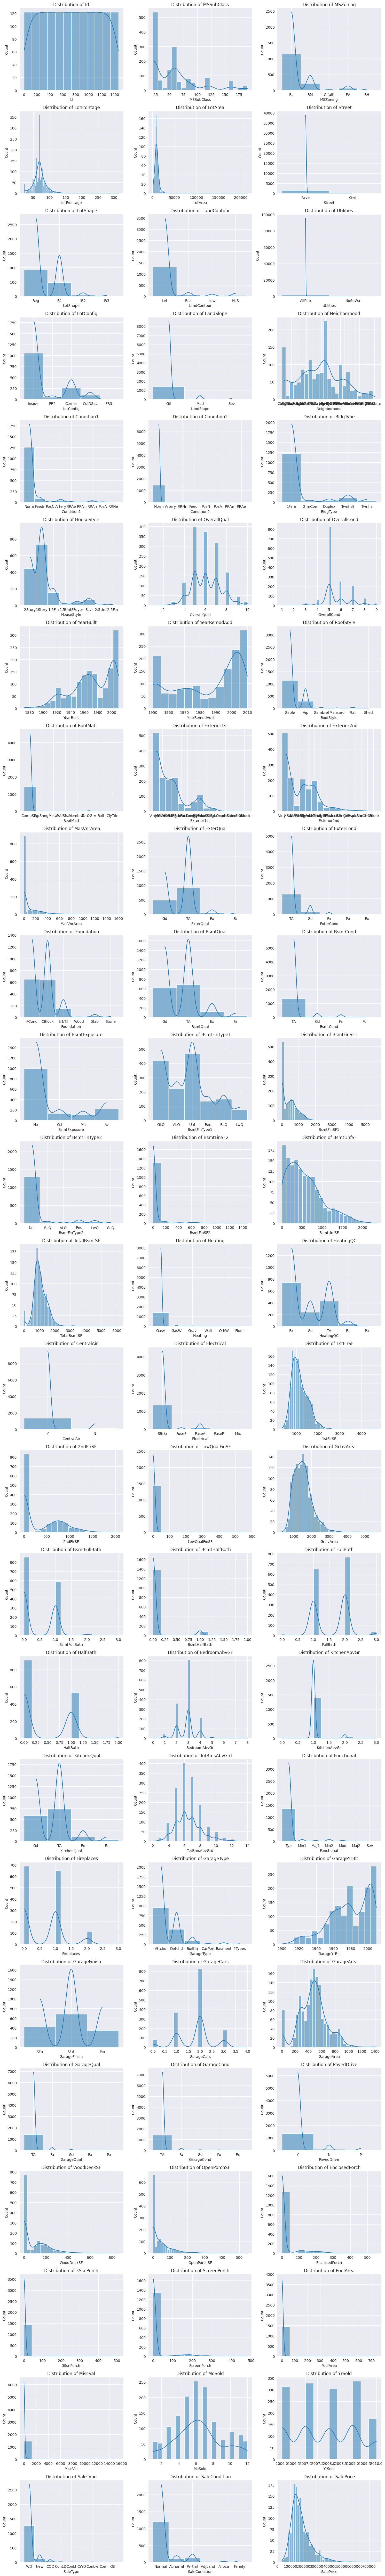

In [ ]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Lable Encoding

In [ ]:
le = LabelEncoder()
df_obj = df.select_dtypes(include=['object'])

df[df_obj.columns] = df_obj.apply(lambda col: le.fit_transform(col))

df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            3          0          4  ...              0          0   
1            3          0          2  ...              0          0   
2            3          0          4  ...              0          0   
3            3          0          0  ...            272          0   
4            3          0          2  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 75 columns]

# Boxplot

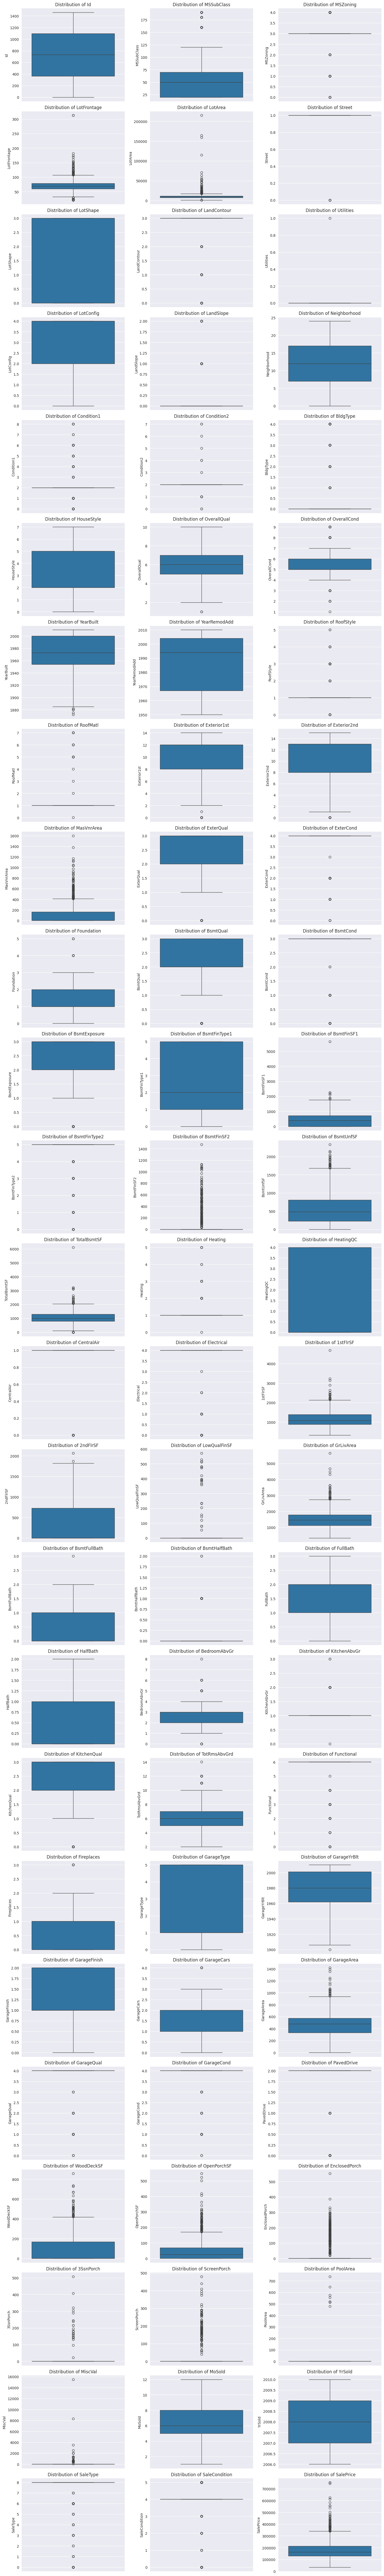

In [ ]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Remove Outlier

In [ ]:
# from numpy._core.defchararray import lower
# num_cols = df.select_dtypes(include=['int64','float64']).columns

# for col in num_cols:
#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)
#   IQR = Q3 - Q1

#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR

#   df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# print("Successfully completed.")

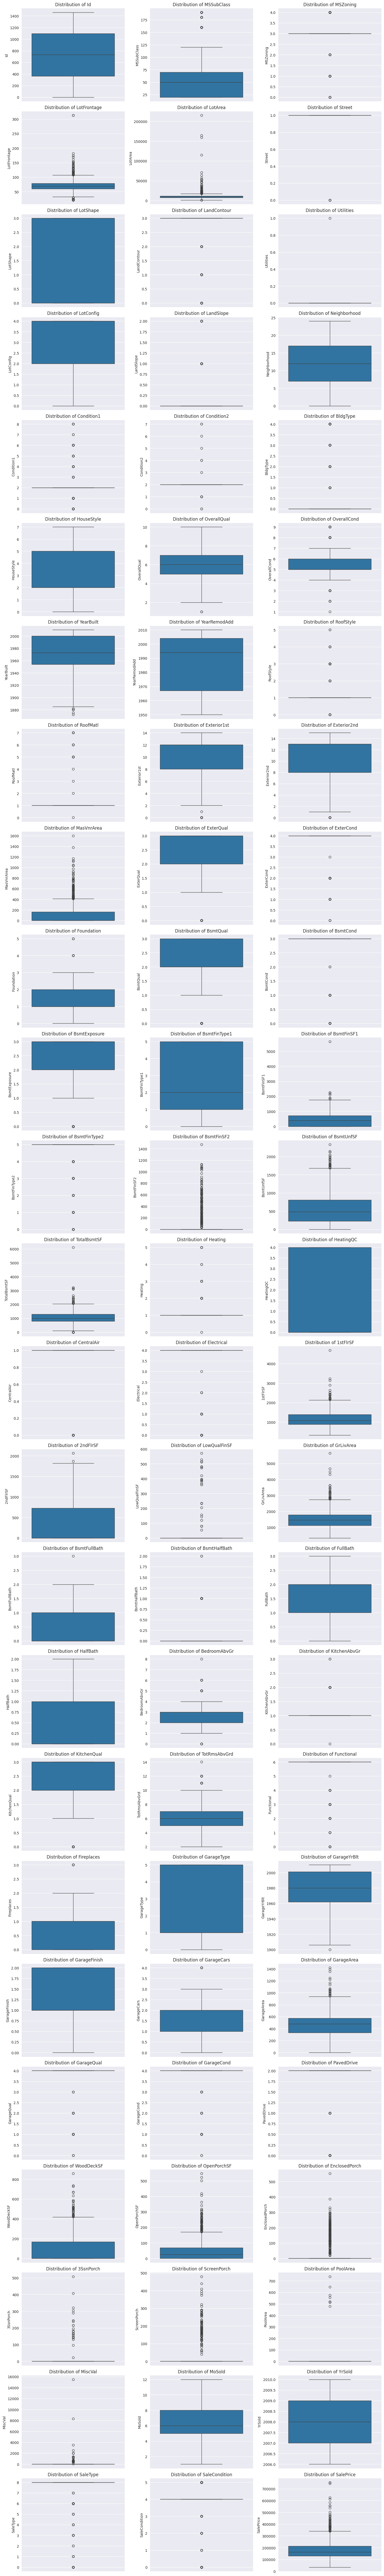

In [ ]:
# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Best Feature Selection

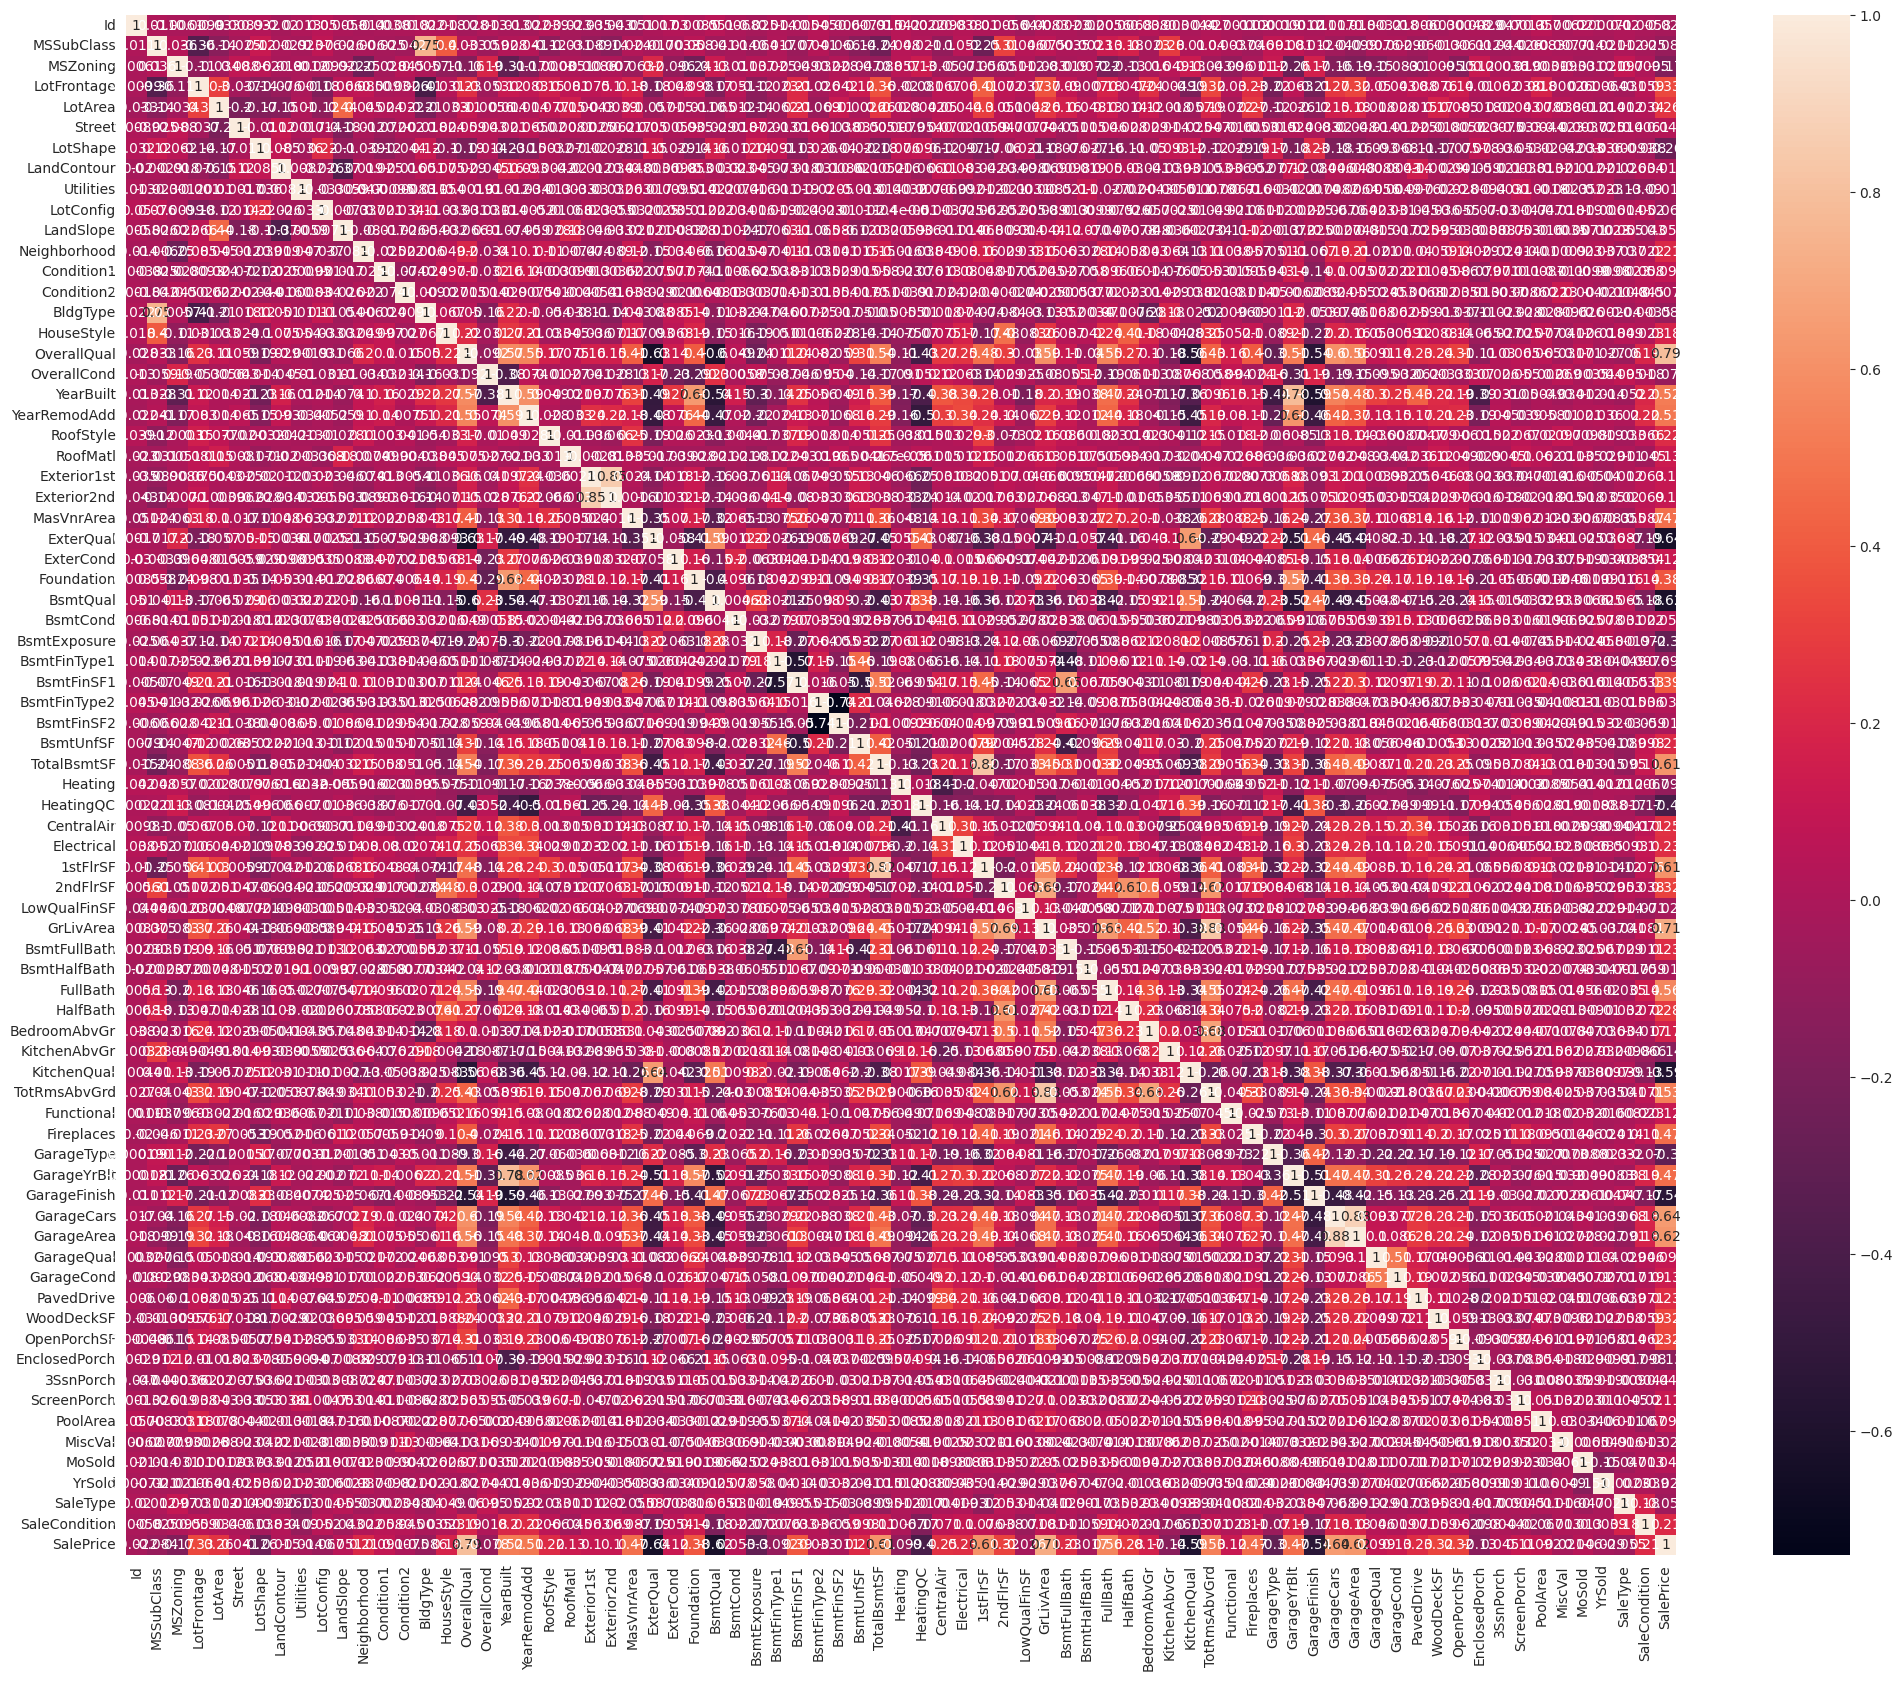

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
target = "SalePrice"
threshold = 0.30  # Terget percentage

# Full correlation (keeps positive/negative sign)
corr_full = df.corr()[target]

# Filter using absolute value but keep actual sign
selected = corr_full[corr_full.abs() >= threshold].sort_values(ascending=False)

# Create DataFrame
corr_df = selected.to_frame().reset_index()
corr_df.columns = ["Feature", "Correlation"]

# Add absolute percent correlation
corr_df["Correlation (%)"] = (corr_df["Correlation"].abs() * 100).round(2)

# Show result
print("\n Correlation with Positive/Negative Sign:\n")
print(corr_df)

# Print feature list only
print("\n Selected Feature Names:")
print(corr_df["Feature"].tolist())
print()



 Correlation with Positive/Negative Sign:

         Feature  Correlation  Correlation (%)
0      SalePrice     1.000000           100.00
1    OverallQual     0.790982            79.10
2      GrLivArea     0.708624            70.86
3     GarageCars     0.640409            64.04
4     GarageArea     0.623431            62.34
5    TotalBsmtSF     0.613581            61.36
6       1stFlrSF     0.605852            60.59
7       FullBath     0.560664            56.07
8   TotRmsAbvGrd     0.533723            53.37
9      YearBuilt     0.522897            52.29
10  YearRemodAdd     0.507101            50.71
11    MasVnrArea     0.472614            47.26
12    Fireplaces     0.466929            46.69
13   GarageYrBlt     0.466754            46.68
14    BsmtFinSF1     0.386420            38.64
15    Foundation     0.382479            38.25
16   LotFrontage     0.334771            33.48
17    WoodDeckSF     0.324413            32.44
18      2ndFlrSF     0.319334            31.93
19   OpenPorchSF

In [ ]:
df2 = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', 'Foundation', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'GarageType', 'HeatingQC', 'GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual']]

df2

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  ...  LotFrontage  \
0          856         2             8       2003  ...         65.0   
1         1262         2             6       1976  ...         80.0   
2          920         2             6       2001  ...         68.0   
3          961         1             7       1915  ...         60.0   
4         1145         2             9       2000  ...         84.0   
...        ...       ...           ...        ...  ...          ...   
1455       953         2             7       1999  ...         62.0   
1456      2073         2             7       1978  ...         85.0   
1457      1188         2             9       1941  ...         66.0   
1458      1078         1             5       1950  ...         68.0   
1459      1256         1             6       1965  ...         75.0   

      WoodDeckSF  2ndFlrSF  OpenPorchSF  GarageType  HeatingQC  GarageFinish  \
0              0       854           61           1          0             1   
1            298         0            0           1          0             1   
2              0       866           42           1          0             1   
3              0       756           35           5          2             2   
4            192      1053           84           1          0             1   
...          ...       ...          ...         ...        ...           ...   
1455           0       694           40           1          0             1   
1456         349         0            0           1          4             2   
1457           0      1152           60           1          0             1   
1458         366         0            0           1          2             2   
1459         736         0           68           1          2             0   

      KitchenQual  BsmtQual  ExterQual  
0               2         2          2  
1               3         2          3  
2               2         2          2  
3               2         3          3  
4               2         2          2  
...           ...       ...        ...  
1455            3         2          3  
1456            3         2          3  
1457            2         3          0  
1458            2         3          3  
1459            3         3          2  

[1460 rows x 26 columns]

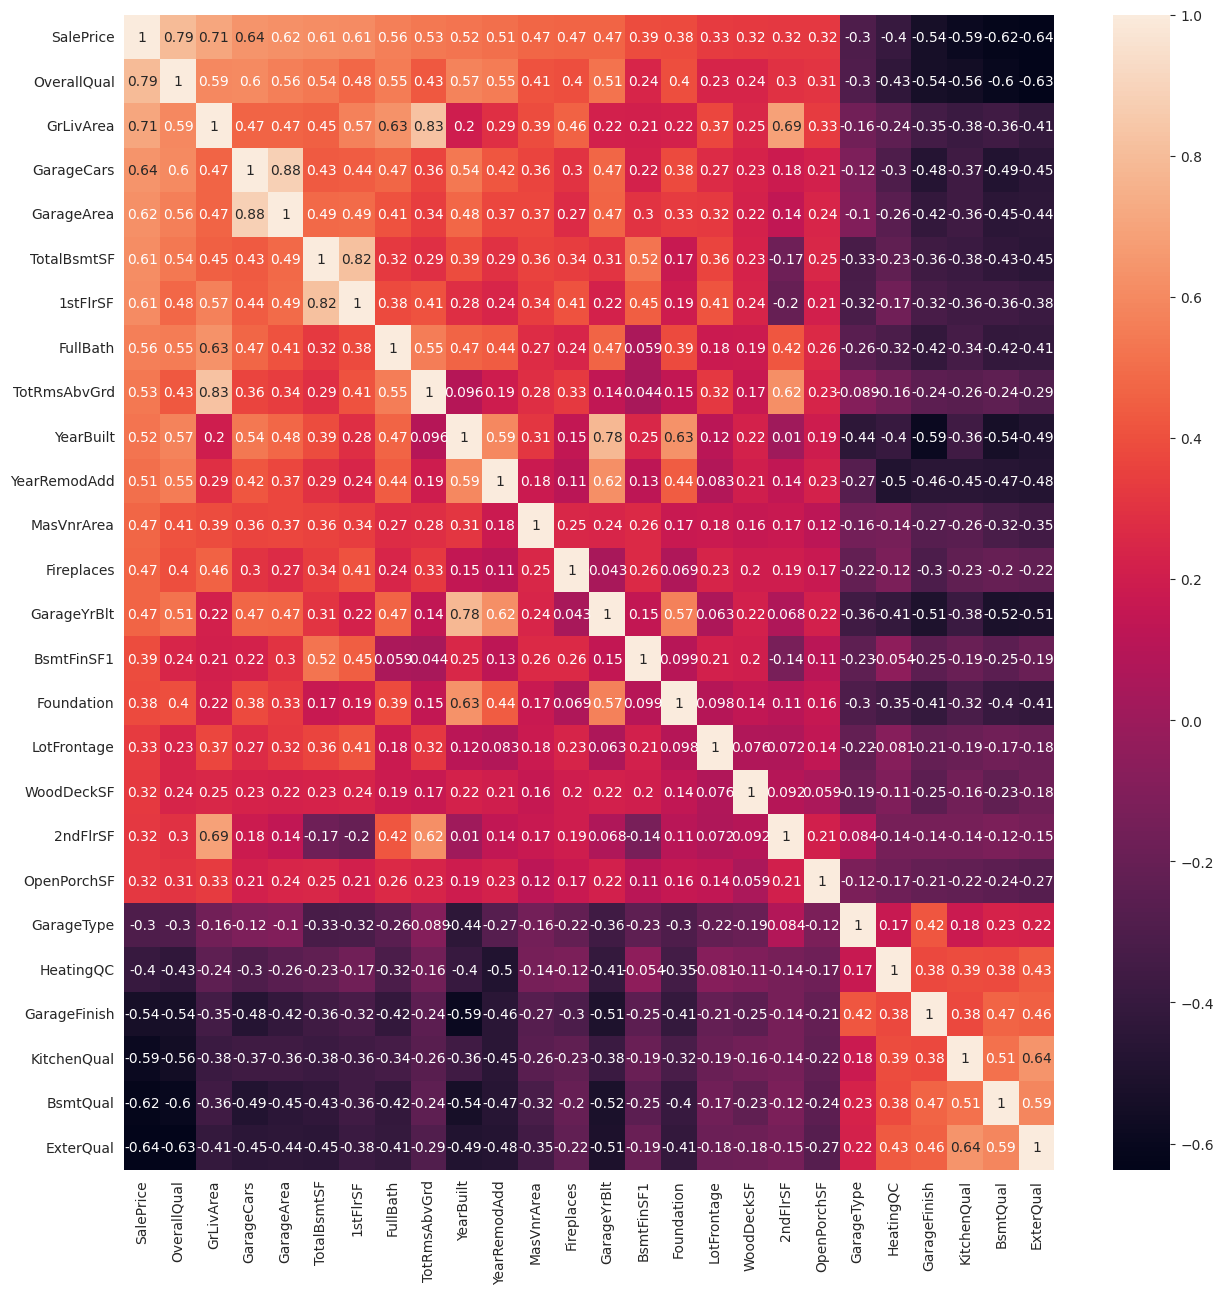

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), annot=True)
plt.show()

# Feature Scaling

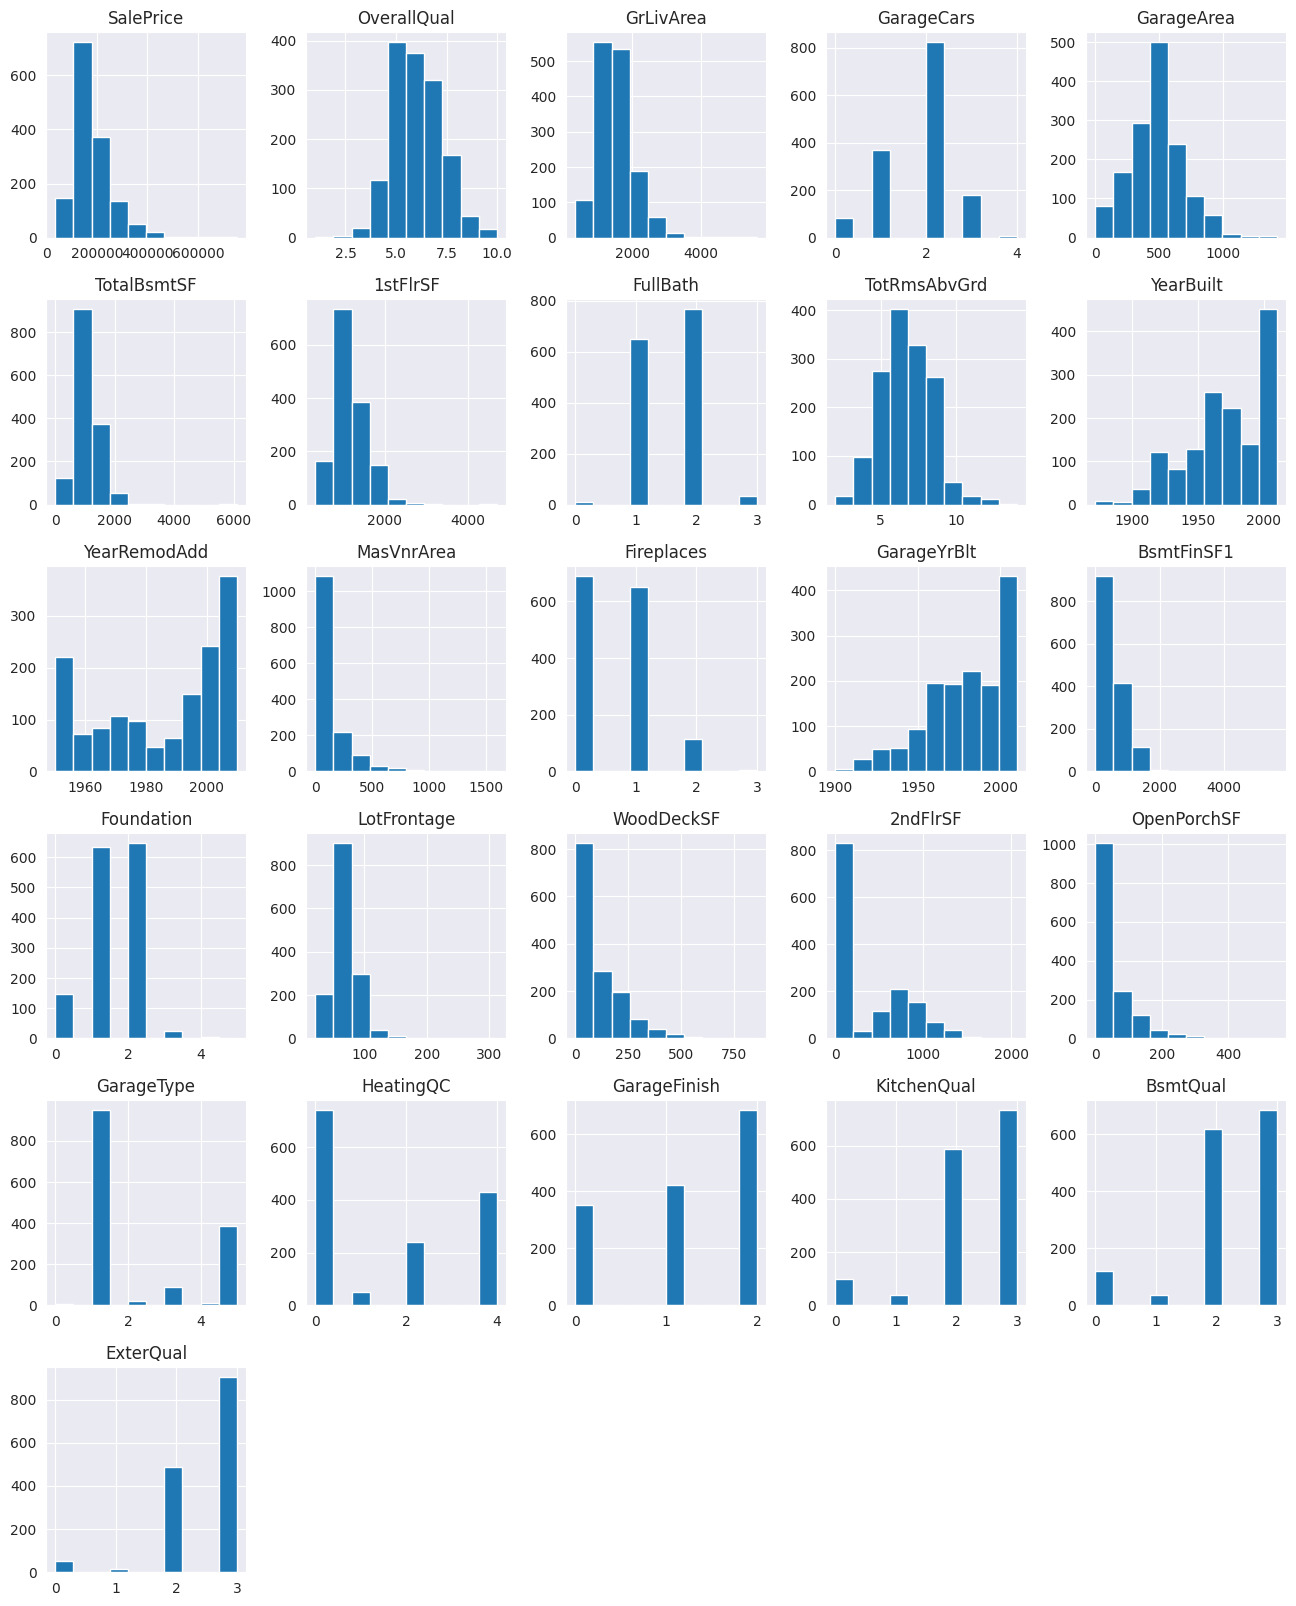

In [ ]:
df2.hist(figsize=(16,20))
plt.show()

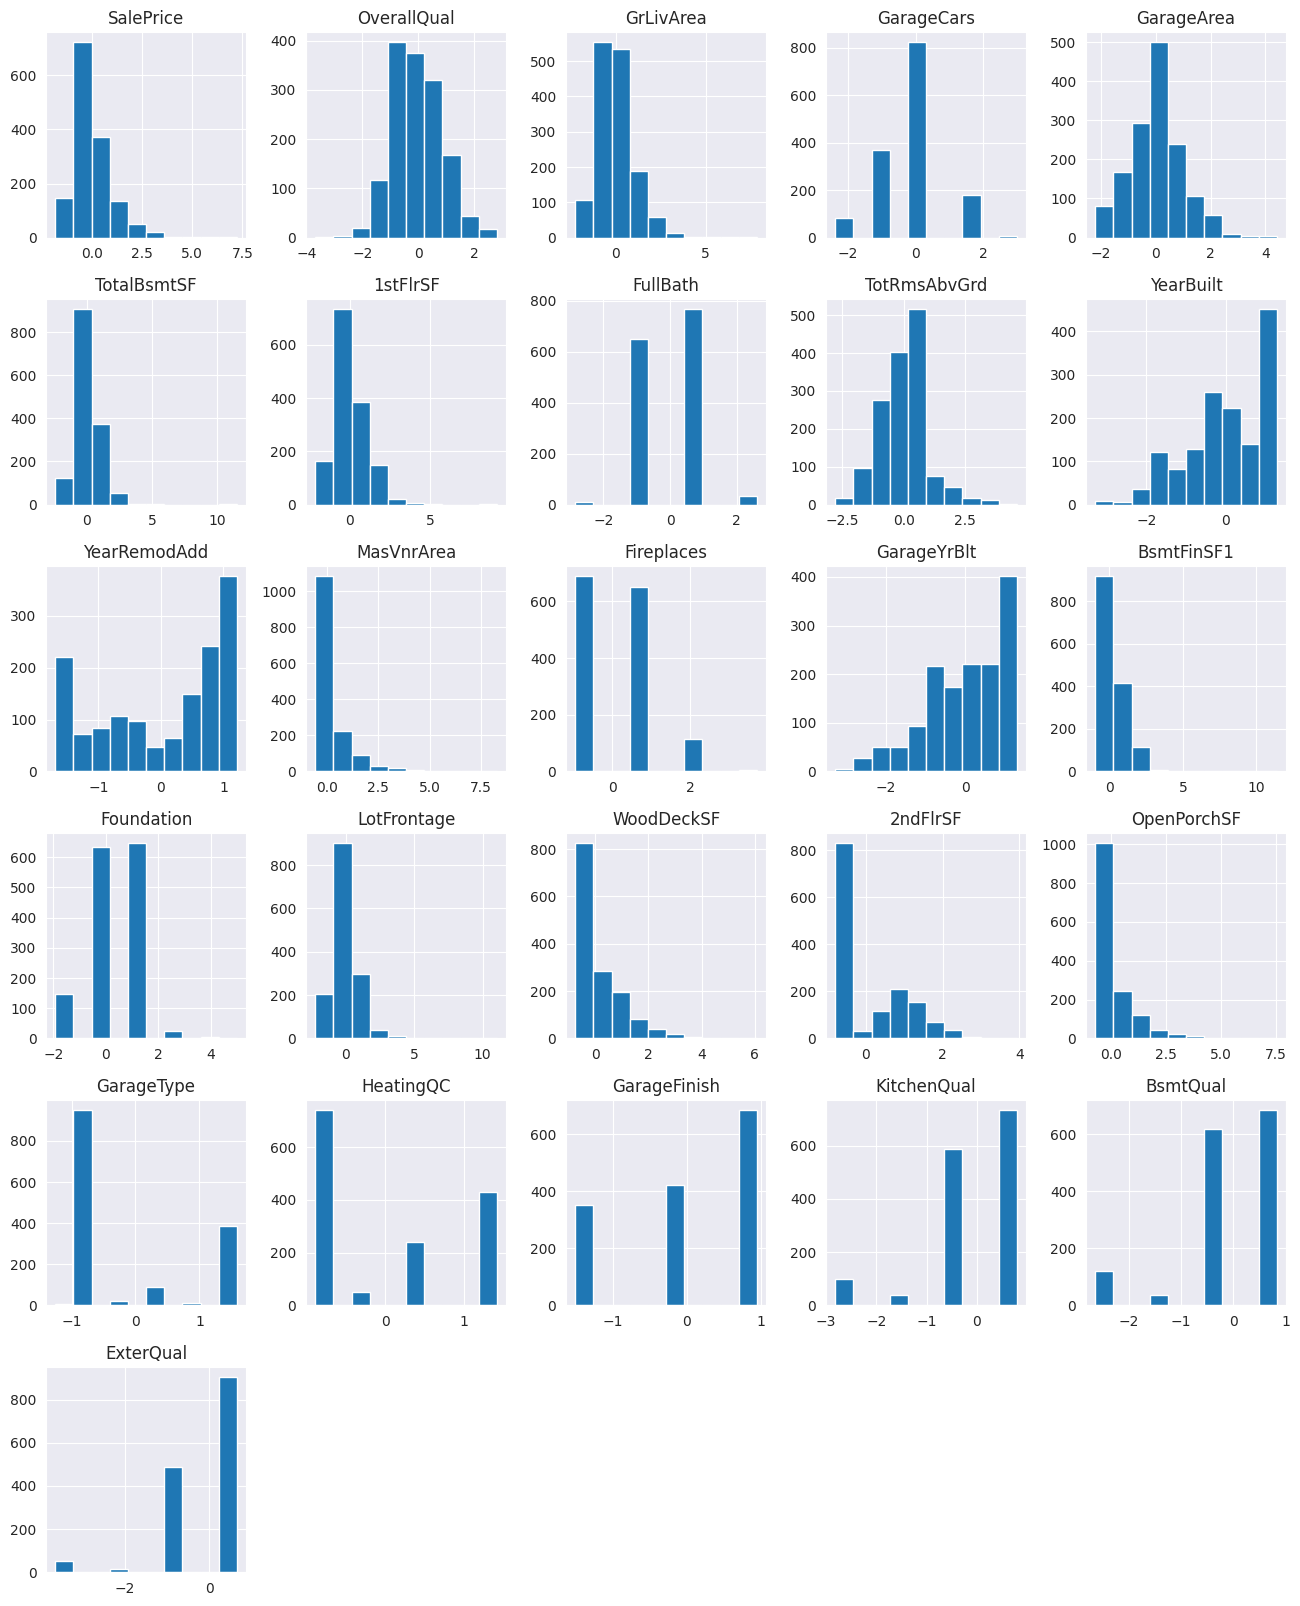

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

num_cols = df2.select_dtypes(include=['int64','float64']).columns

df2[num_cols] = df2[num_cols].apply(
    lambda col: pd.Series(
        ss.fit_transform(col.values.reshape(-1,1)).flatten()
    )
)

df2.hist(figsize=(16,20))
plt.show()


# Best Model Selection


==================== MODEL PERFORMANCE (SIMPLE SCORE) ====================

Linear Regression: Score = 0.8451
Ridge Regression: Score = 0.8451
Lasso Regression: Score = 0.8451
ElasticNet: Score = 0.8390
Decision Tree: Score = 0.7839
Random Forest: Score = 0.8961
Extra Trees: Score = 0.8868
Gradient Boosting: Score = 0.8948
AdaBoost Regressor: Score = 0.8433
Bagging Regressor: Score = 0.8747
KNN Regressor: Score = 0.7844
SVR: Score = -0.0243
MLP Neural Network: Score = 0.8678
XGBoost: Score = 0.9228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3350
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 69
[LightGBM] [Info] Start training from score 181441.541952
LightGBM: Score = 0.8892

==================== SORTED SCORE (DESC) ==================

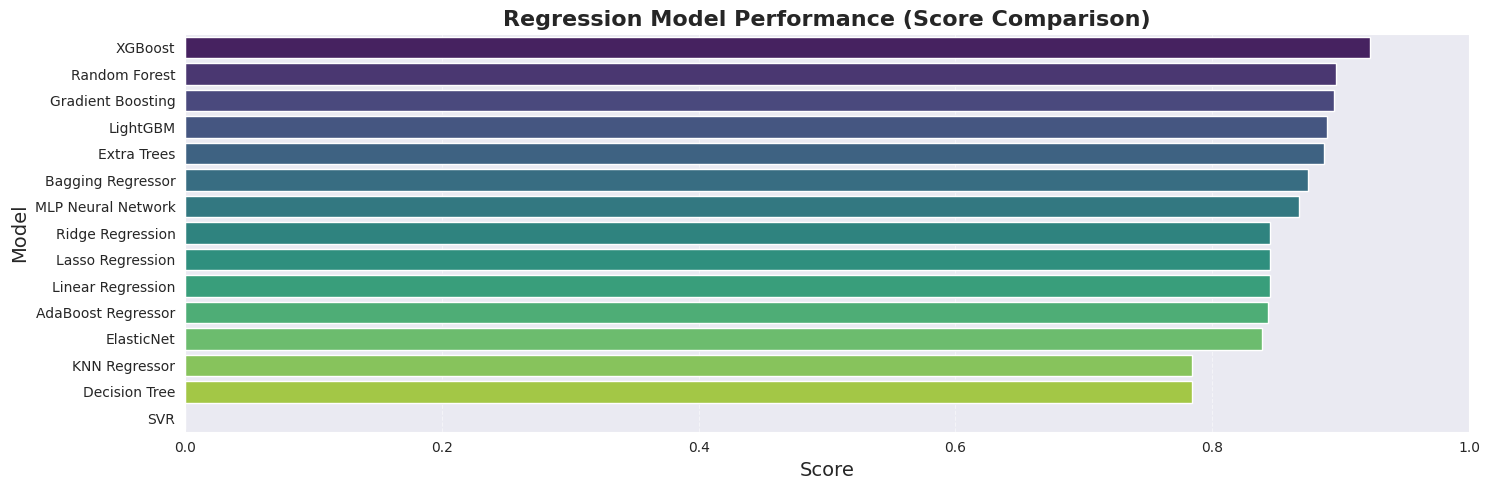

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===============================================
# DATA
# ===============================================
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================================
# SCALER for models that need scaling
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# TRY IMPORT ADVANCED MODELS
# ===============================================
advanced_models = {}

try:
    from xgboost import XGBRegressor
    advanced_models["XGBoost"] = XGBRegressor(
        objective="reg:squarederror",
        eval_metric="rmse",
        learning_rate=0.05,
        max_depth=6,
        n_estimators=500,
        subsample=0.8,
        colsample_bytree=0.8,
    )
except:
    pass

try:
    from lightgbm import LGBMRegressor
    advanced_models["LightGBM"] = LGBMRegressor(
        learning_rate=0.05,
        n_estimators=500
    )
except:
    pass

try:
    from catboost import CatBoostRegressor
    advanced_models["CatBoost"] = CatBoostRegressor(
        verbose=False,
        depth=8,
        learning_rate=0.05,
        iterations=500
    )
except:
    pass


# ===============================================
# BASIC REGRESSION MODELS
# ===============================================
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

models = {
    # Linear Models
    "Linear Regression": (LinearRegression(), True),
    "Ridge Regression": (Ridge(), True),
    "Lasso Regression": (Lasso(), True),
    "ElasticNet": (ElasticNet(), True),

    # Tree & Ensemble Models
    "Decision Tree": (DecisionTreeRegressor(), False),
    "Random Forest": (RandomForestRegressor(), False),
    "Extra Trees": (ExtraTreesRegressor(), False),
    "Gradient Boosting": (GradientBoostingRegressor(), False),
    "AdaBoost Regressor": (AdaBoostRegressor(), False),
    "Bagging Regressor": (BaggingRegressor(), False),

    # Distance & Neural Models
    "KNN Regressor": (KNeighborsRegressor(n_neighbors=5, weights="distance"), True),
    "SVR": (SVR(), True),
    "MLP Neural Network": (MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=3000), True)
}

# Add advanced models (skip scaling)
for name, model in advanced_models.items():
    models[name] = (model, False)


# ===============================================
# RUN ALL MODELS (SAFE MODE)
# ===============================================
scores = {}

print("\n==================== MODEL PERFORMANCE (SIMPLE SCORE) ====================\n")

for name, (model, need_scaling) in models.items():
    try:
        if need_scaling:
            model.fit(X_train_scaled, y_train)
            score = model.score(X_test_scaled, y_test)
        else:
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)

        scores[name] = score
        print(f"{name}: Score = {score:.4f}")

    except Exception as e:
        print(f"{name}:  Skipped (Error)")


# ===============================================
# SORT MODELS BY SCORE
# ===============================================
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

print("\n==================== SORTED SCORE (DESC) ====================")
for model, score in sorted_scores:
    print(f"{model}: {score:.4f}")

best_model = sorted_scores[0]
print("\n BEST MODEL =", best_model[0])
print(" Score =", round(best_model[1], 4))


# ===============================================
# MODEL ACCURACY PLOT
# ===============================================
plot_df = pd.DataFrame(sorted_scores, columns=["Model", "Score"])

plt.figure(figsize=(15, 5))
sns.barplot(data=plot_df, x="Score", y="Model", palette="viridis")

plt.title("Regression Model Performance (Score Comparison)", fontsize=16, fontweight='bold')
plt.xlabel("Score", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# XGBRegressor Model

In [ ]:
from xgboost import XGBRegressor

# Features and target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create simple XGBoost model
model = XGBRegressor(eval_metric="rmse")

# Train
model.fit(X_train, y_train)

# Predict
pred = model.predict(X_test)

# Simple score (R² score)
score = model.score(X_test, y_test)

print(f"XGBoost Score: {round(score*100, 4)}%")


XGBoost Score: 90.9891%
